# TP éval. par les pairs : Sujet 1 - Concentration de CO2 dans l'atmosphère depuis 1958

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

Les données de mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis, sont disponible sur le [site Web de l'institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). Date de téléchargement : 18/11/2021. 

In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"
data_filename = 'monthly_in_situ_co2_mlo.csv'

# On essaie de lire le fichier csv local si il existe, sinon on le telecharge
# de maniere a avoir une copie locale.
# Les 54 premieres lignes décrivent les données

try:
    raw_data = pd.read_csv(data_filename, skiprows=54)
except FileNotFoundError:
    req = requests.get(data_url)
    url_content = req.content
    csv_file = open(data_filename, 'wb')
    csv_file.write(url_content)
    raw_data = pd.read_csv(data_filename, skiprows=54)

raw_data

Yr   Mn      Date        Date        CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200   1958.0411     -99.99      -99.99       -99.99   
3    1958   02     21231   1958.1260     -99.99      -99.99       -99.99   
4    1958   03     21259   1958.2027     315.71      314.43       316.20   
5    1958   04     21290   1958.2877     317.45      315.16       317.30   
6    1958   05     21320   1958.3699     317.51      314.71       317.87   
7    1958   06     21351   1958.4548     -99.99      -99.99       317.25   
8    1958   07     21381   1958.5370     315.86      315.20       315.86   
9    1958   08     21412   1958.6219     314.93      316.20       313.99   
10   1958   09     21443   1958.7068     313.21      316.09       312.46   
11   1958   10     21473   1958.7890     -99.99      -99.99       312.44   
12   1958   11     21504   1958.8740     313.33      315.20       313.61   
13   1958   12     21534   1958.9562     314.67      315.43       314.77   
14   1959   01     21565   1959.0411     315.58      315.54       315.63   
15   1959   02     21596   1959.1260     316.49      315.85       316.28   
16   1959   03     21624   1959.2027     316.65      315.37       316.99   
17   1959   04     21655   1959.2877     317.72      315.42       318.09   
18   1959   05     21685   1959.3699     318.29      315.48       318.66   
19   1959   06     21716   1959.4548     318.15      316.02       318.05   
20   1959   07     21746   1959.5370     316.54      315.87       316.67   
21   1959   08     21777   1959.6219     314.80      316.07       314.82   
22   1959   09     21808   1959.7068     313.84      316.73       313.32   
23   1959   10     21838   1959.7890     313.33      316.33       313.33   
24   1959   11     21869   1959.8740     314.81      316.69       314.54   
25   1959   12     21899   1959.9562     315.58      316.35       315.72   
26   1960   01     21930   1960.0410     316.43      316.39       316.61   
27   1960   02     21961   1960.1257     316.98      316.34       317.28   
28   1960   03     21990   1960.2049     317.58      316.27       318.04   
29   1960   04     22021   1960.2896     319.03      316.70       319.14   
..    ...  ...       ...         ...        ...         ...          ...   
740  2019   07     43661   2019.5370     411.78      410.97       412.29   
741  2019   08     43692   2019.6219     410.01      411.56       410.15   
742  2019   09     43723   2019.7068     408.48      411.98       408.44   
743  2019   10     43753   2019.7890     408.40      412.02       408.57   
744  2019   11     43784   2019.8740     410.16      412.44       410.15   
745  2019   12     43814   2019.9562     411.81      412.74       411.70   
746  2020   01     43845   2020.0410     413.30      413.25       412.90   
747  2020   02     43876   2020.1257     414.05      413.28       413.82   
748  2020   03     43905   2020.2049     414.45      412.87       414.83   
749  2020   04     43936   2020.2896     416.11      413.29       416.28   
750  2020   05     43966   2020.3716     417.15      413.74       417.05   
751  2020   06     43997   2020.4563     416.29      413.73       416.38   
752  2020   07     44027   2020.5383     414.42      413.64       414.79   
753  2020   08     44058   2020.6230     412.52      414.10       412.63   
754  2020   09     44089   2020.7077     411.18      414.70       410.91   
755  2020   10     44119   2020.7896     411.12      414.75       411.02   
756  2020   11     44150   2020.8743     412.88      415.16       412.57   
757  2020   12     44180   2020.9563     413.89      414.82       414.08   
758  2021   01     44211   2021.0411     415.15      415.10       415.22   
759  2021   02     44242   2021.1260     416.47      415.70       416.10   
760  2021   03     44270   2021.2027     417.16      41

In [3]:
# On retire les 2 premiere lignes qui contiennent des commentaires et des unites
raw_data = raw_data[2:]
# On regarde les noms des colonnes
raw_data.columns

Index(['  Yr', ' Mn', '    Date', '      Date', '     CO2', 'seasonally',
       '        fit', '  seasonally', '      CO2', ' seasonally'],
      dtype='object')

In [4]:
# Remplacement des noms des colonnes par des noms plus pratiques et surtout uniques
cols = raw_data.columns
data = raw_data.rename(columns= {cols[0]:'Yr', cols[1]:'Mn', cols[2]:'Date_Excel', cols[3]:'Date', cols[4]:'CO2', cols[5]:'seasonally_adjusted',
                    cols[6]:'fit', cols[7]:'seasonally_adjusted_fit', cols[8]:'CO2_filled', cols[9]:'seasonally_adjusted_filled'})

In [5]:
# On teste si certaines lignes ne sont pas complètes
# -> pas le cas, cependant une inspection visuelle, confirmée par le header du document,
# montre que des données sont manquantes et sont dénotées par -99.99

data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Yr, Mn, Date_Excel, Date, CO2, seasonally_adjusted, fit, seasonally_adjusted_fit, CO2_filled, seasonally_adjusted_filled]
Index: []

In [9]:
# On transforme les valeurs manquante de -99.99 en NaN
# On transforme d abord les valeurs en float

data.iloc[:, 3:] = data.iloc[:, 3:].astype(float)

data = data.replace(-99.99, np.nan)


In [135]:
# Finalement on termine le pre traitement en re assignant les indices
data = data.set_index('Date')
data

KeyError: 'Date'

On va maitenant examiner la colonne 'CO2'
On constate une variation lente superposé à une oscillation périodique, annuelle.

On va décomposer ces 2 variations à l'aide d'un polynome de degré 3 pour la variation 
lente et d'un modèle sinusoidale pour la variation annuelle.

[ 4.14866741e-05 -2.34324344e-01  4.41306168e+02 -2.76839348e+05]


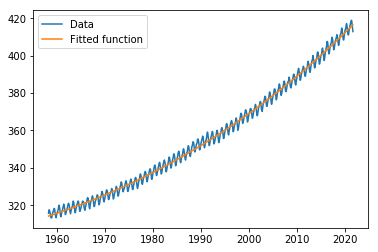

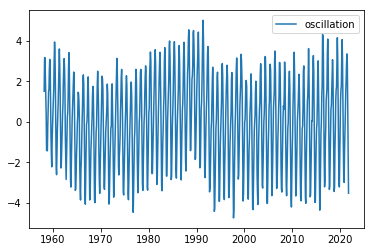

In [109]:
from scipy import optimize

# on enleve les lignes ne contenant pour de mesure
data_cln = data[data['CO2'] > 1]
x, y = data_cln.index, data_cln['CO2']

# fit par un polynome degré 3
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
pfit = p(x)
print(z)

# plot des données de base + le fit
plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Data')
plt.plot(x, pfit, label='Fitted function')
plt.legend()

# on soustrait aux données la fit polynomial pour isoler la variation annuelle
plt.figure(figsize=(6, 4))
detrend_y = y - pfit
plt.plot(x, detrend_y, label='oscillation')
plt.legend()


[-0.0121165   2.86744008  6.28571768 -5.40388516]


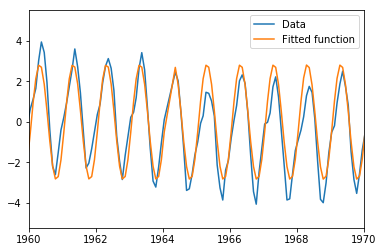

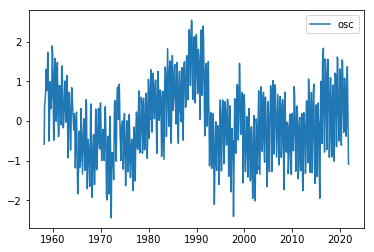

In [126]:
# on fit maintenant les données auxquelles on a soustrait la variation lente
# avec un modèle sinusoidal
# on prend comme pulsation : 2 * pi / 1, et on estime l'amplitude initiale a ~ 3

def sin(x, a1,a2,a3,a4):
    return a1 + a2 * np.sin(a3*x + a4)

params, params_covariance = optimize.curve_fit(sin, x,detrend_y, p0=[0,3,2*np.pi/1,0])
print(params)

sfit = sin(x, *params)

# plot du fit sinusoidale, on zoom pour mieux visualiser
plt.figure(figsize=(6, 4))
plt.plot(x, detrend_y, label='Data')
plt.plot(x, sfit, label='Fitted function')
plt.legend()
plt.xlim((1960,1970))

# on plot les résidus
plt.figure(figsize=(6, 4))
plt.plot(x, detrend_y - sfit, label='osc')
plt.legend()

(380, 440)

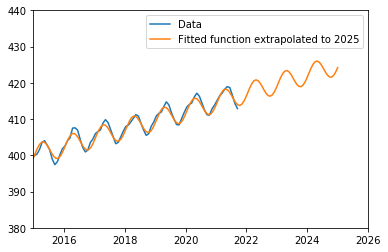

In [144]:
# on somme les 2 fits et on extrapole jusqu'en 2025

time_sample = np.linspace(1958, 2025, 1000)
fit_2025 = p(time_sample) + sin(time_sample, *params)

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Data')
plt.plot(time_sample, fit_2025, label='Fitted function extrapolated to 2025')
plt.legend()
plt.xlim((2015,2026))
plt.ylim((380,440))

(380, 440)

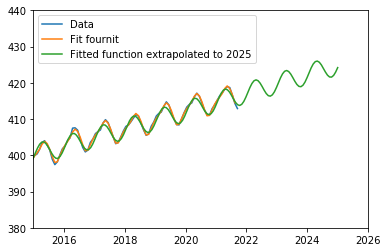

In [149]:
# On peut comparer notre résultat avec le fit fournit dans le fichier de données

plt.figure(figsize=(6, 4))
plt.plot(x, y, label='Data')
plt.plot(data.index, data['fit'], label='Fit fournit')
plt.plot(time_sample, fit_2025, label='Fitted function extrapolated to 2025')
plt.legend()
plt.xlim((2015,2026))
plt.ylim((380,440))

On constate que notre modèle mériterait plus de raffinement mais devrait permettre tout de même de prédire relativement précisément la variation future du taux de CO2